# Recursos Hídricos en Sonora

...

## 1. Setup

In [1]:
from pathlib import Path

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [2]:
import matplotlib.dates as mdates

Configuraciones generales:

In [3]:
plt.style.use('ggplot')

In [4]:
sns.set_theme(style="darkgrid")

In [5]:
# pandas float format
pd.options.display.float_format = '{:.2f}'.format

# pandas display format
pd.options.display.max_rows = 10

Definimos las rutas de los directorios de datos: 

In [6]:
# Ruta al directorio de datos
data_dir = Path().resolve().parent / "data"

# Datos procesados
processed_dir = data_dir / "processed"

assert processed_dir.exists() & processed_dir.is_dir()

La ruta al  conjunto de datos procesados `recursor-hidricos-sonora`:

In [7]:
hidricos_dir = processed_dir / "hidricos"

assert hidricos_dir.exists() & hidricos_dir.is_dir()

for item in hidricos_dir.iterdir(): 
    print(item.relative_to(data_dir.parent))

data\processed\hidricos\hidricos_processed.csv
data\processed\hidricos\presas_processed.csv


In [8]:
hidricos_path = hidricos_dir / "hidricos_processed.csv"
presas_path = hidricos_dir / "presas_processed.csv"

Definimos algunos directorios auxiliares: 

In [9]:
temp_dir = data_dir / "temp"
temp_dir.mkdir(exist_ok=True)

eda_dir = data_dir / "eda"
eda_dir.mkdir(exist_ok=True)

## 1.1 Funciones auxiliares

A continuación definimos funcionea auxiliares:

In [10]:
def get_sonora_map():
    sonora_coords = (29.072967, -110.955919)
    return folium.Map(location=sonora_coords, zoom_start=12)

## 2. Datos

In [11]:
# hidricos
hidricos = pd.read_csv(hidricos_path, index_col=0)

# presas
presas = pd.read_csv(presas_path, index_col=0)

In [12]:
hidricos.head(10)

,clave,fecha,almacenamiento_hm3
0,lcdso,1941/07/01,0.13
1,chtso,1941/07/01,-
2,chtso,1941/07/02,-
3,lcdso,1941/07/02,0.15
4,lcdso,1941/07/03,0.16
5,chtso,1941/07/03,-
6,chtso,1941/07/04,-
7,lcdso,1941/07/04,0.16
8,lcdso,1941/07/05,0.15
9,chtso,1941/07/05,-


In [13]:
hidricos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202993 entries, 0 to 16058
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   clave               202993 non-null  object
 1   fecha               202993 non-null  object
 2   almacenamiento_hm3  202993 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


* La columna fecha debería de ser de tipo `timestamp`. 

* La columna `almacenamiento_hm3` es inconsistente, ya que es de  tipo `object` y debería ser float. Además, donde no hay valores se colocaron `-`, cuando deberían de ser registros nulos. 

In [14]:
presas

,clave,comision,subdireccion,presa,nombre_comun,estado,municipio,cap_name,cap_namo,vol_muerto,río,numero,latitud,longitud,altitud,identificador_cuenca_disponibilidad,cuenca de disponibilidad,numero_region_hidrologica,region_hidrológica
0,lcdso,comisión nacional del agua,subdirección general técnica,lázaro cárdenas,la angostura,sonora,nacozari de garcía,1116,703,10,río yaqui,181,30,-109,860,102,río bavispe,9,sur
1,pecso,comisión nacional del agua,subdirección general técnica,plutarco elías calles,el novillo,sonora,soyopa,3312,2833,200,río yaqui,182,29,-110,2110,103,río yaqui 1,9,sur
2,aobso,comisión nacional del agua,subdirección general técnica,álvaro obregón,oviachic,sonora,cajeme,4409,3023,23,río yaqui,177,28,-110,116,104,río yaqui 2,9,sur
3,agzch,comisión nacional del agua,subdirección general técnica,abraham gonzález,guadalupe,chihuahua,guerrero,103,79,2,otros,25,28,-107,2020,103,río yaqui 1,9,sur
4,arcso,comisión nacional del agua,subdirección general técnica,adolfo ruiz cortines,mocúzari,sonora,alamos,1823,1200,8,río mayo,175,27,-109,148,108,río mayo 2,9,sur
5,pmoso,comisión nacional del agua,subdirección general técnica,ing. rodolfo félix valdés,el molinito,sonora,hermosillo,222,121,15,río sonora,180,29,-111,321,100,río sonora 2,9,sur
6,arlso,comisión nacional del agua,subdirección general técnica,abelardo rodríguez luján,hermosillo,sonora,hermosillo,284,220,2,río sonora,179,29,-111,230,100,río sonora 2,9,sur
7,chtso,comisión nacional del agua,subdirección general técnica,cuauhtémoc,santa teresa,sonora,tubutama,66,42,2,otros,183,31,-112,590,92,río magdalena,8,norte
8,iraso,comisión nacional del agua,subdirección general técnica,ignacio r. alatorre,punta de agua,sonora,guaymas,30,16,0,otros,178,28,-110,245,110,río mátape,9,sur
9,bicso,comisión nacional del agua,subdirección general técnica,bicentenario,los pilares,sonora,álamos,466,393,0,río mayo,0,27,-109,164,108,río mayo,9,sur


In [15]:
presas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0 to 9
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   clave                                10 non-null     object
 1   comision                             10 non-null     object
 2   subdireccion                         10 non-null     object
 3   presa                                10 non-null     object
 4   nombre_comun                         10 non-null     object
 5   estado                               10 non-null     object
 6   municipio                            10 non-null     object
 7   cap_name                             10 non-null     int64 
 8   cap_namo                             10 non-null     int64 
 9   vol_muerto                           10 non-null     int64 
 10  río                                  10 non-null     object
 11  numero                               10 non-null     

### 2.1 Validación de los datos

#### Recursos hidricos

Como se verificó anteriormente, conjunto `recursos-hidricos-sonora` necesita ser tratado.

Transformamos el atributo `fecha` en *timestamp*:   

In [16]:
hidricos['fecha'] = pd.to_datetime(hidricos['fecha'], format='mixed')

Transformamos la columna `almacenamiento_hm3` a tipo `float`: 

In [17]:
def to_float(row):
    try:
        row['almacenamiento_hm_3'] = float(row['almacenamiento_hm_3'])
    except (ValueError, TypeError):
        row['almacenamiento_hm_3'] = pd.NA
    finally: 
        return row

In [18]:
hidricos['almacenamiento_hm3'] = pd.to_numeric(hidricos['almacenamiento_hm3'], errors='coerce')

Verificamos resultados: 

In [19]:
hidricos.head()

,clave,fecha,almacenamiento_hm3
0,lcdso,1941-07-01,0.13
1,chtso,1941-07-01,NaN
2,chtso,1941-07-02,NaN
3,lcdso,1941-07-02,0.15
4,lcdso,1941-07-03,0.16


In [20]:
hidricos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202993 entries, 0 to 16058
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   clave               202993 non-null  object        
 1   fecha               202993 non-null  datetime64[ns]
 2   almacenamiento_hm3  189320 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 6.2+ MB


In [21]:
hidricos.describe()

,fecha,almacenamiento_hm3
count,202993,189320.00
mean,1992-06-11 03:51:03.209076224,518.48
min,1941-07-01 00:00:00,0.00
25%,1978-07-28 00:00:00,20.58
50%,1994-01-03 00:00:00,97.95
75%,2009-06-12 00:00:00,755.31
max,2024-09-19 00:00:00,3356.50
std,NaN,743.25


Observamos que la fecha mínima es de 1941 para el conjunto `recursos-hidricos-sonora`. Por otro lado, la fecha máxima de los datos de producción agricola es 2021. 

Por lo anterior, considerremos los datos de recursos hídricos desde 1999 hasta 2024. 

In [22]:
hidricos = hidricos[hidricos['fecha'].dt.year >= 1999]

In [23]:
hidricos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85089 entries, 29583 to 16058
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   clave               85089 non-null  object        
 1   fecha               85089 non-null  datetime64[ns]
 2   almacenamiento_hm3  85088 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 2.6+ MB


### 2.2 Unificación de los datos

In [24]:
presas

,clave,comision,subdireccion,presa,nombre_comun,estado,municipio,cap_name,cap_namo,vol_muerto,río,numero,latitud,longitud,altitud,identificador_cuenca_disponibilidad,cuenca de disponibilidad,numero_region_hidrologica,region_hidrológica
0,lcdso,comisión nacional del agua,subdirección general técnica,lázaro cárdenas,la angostura,sonora,nacozari de garcía,1116,703,10,río yaqui,181,30,-109,860,102,río bavispe,9,sur
1,pecso,comisión nacional del agua,subdirección general técnica,plutarco elías calles,el novillo,sonora,soyopa,3312,2833,200,río yaqui,182,29,-110,2110,103,río yaqui 1,9,sur
2,aobso,comisión nacional del agua,subdirección general técnica,álvaro obregón,oviachic,sonora,cajeme,4409,3023,23,río yaqui,177,28,-110,116,104,río yaqui 2,9,sur
3,agzch,comisión nacional del agua,subdirección general técnica,abraham gonzález,guadalupe,chihuahua,guerrero,103,79,2,otros,25,28,-107,2020,103,río yaqui 1,9,sur
4,arcso,comisión nacional del agua,subdirección general técnica,adolfo ruiz cortines,mocúzari,sonora,alamos,1823,1200,8,río mayo,175,27,-109,148,108,río mayo 2,9,sur
5,pmoso,comisión nacional del agua,subdirección general técnica,ing. rodolfo félix valdés,el molinito,sonora,hermosillo,222,121,15,río sonora,180,29,-111,321,100,río sonora 2,9,sur
6,arlso,comisión nacional del agua,subdirección general técnica,abelardo rodríguez luján,hermosillo,sonora,hermosillo,284,220,2,río sonora,179,29,-111,230,100,río sonora 2,9,sur
7,chtso,comisión nacional del agua,subdirección general técnica,cuauhtémoc,santa teresa,sonora,tubutama,66,42,2,otros,183,31,-112,590,92,río magdalena,8,norte
8,iraso,comisión nacional del agua,subdirección general técnica,ignacio r. alatorre,punta de agua,sonora,guaymas,30,16,0,otros,178,28,-110,245,110,río mátape,9,sur
9,bicso,comisión nacional del agua,subdirección general técnica,bicentenario,los pilares,sonora,álamos,466,393,0,río mayo,0,27,-109,164,108,río mayo,9,sur


Conviene mapear el nombre de la presa en el conjunto `recursos-hidricos-sonora`: 

In [25]:
dict_presa = presas.set_index('clave')['presa'].to_dict()

In [26]:
hidricos['presa'] = hidricos['clave'].map(dict_presa)

In [27]:
dict_nombre_comun = presas.set_index('clave')['nombre_comun']

In [28]:
hidricos['presa_nombre_comun'] = hidricos['clave'].map(dict_nombre_comun)

In [29]:
hidricos;  # OK

Guardamos los datos para futuras refenrecnias: 

In [30]:
hidricos.to_csv(eda_dir / "hidricos_1999.csv")

## 3. EDA

Cargamos los datos actualizados: 

In [31]:
hidricos = pd.read_csv(eda_dir / "hidricos_1999.csv", index_col=0)

In [32]:
hidricos['fecha'] = pd.to_datetime(hidricos['fecha'])

Total de presas únicas:

In [33]:
len(presas.presa.unique())

10

Total de registros: 

In [34]:
total = len(hidricos)
total

85089

La fecha mínima, máxima: 

In [35]:
hidricos.fecha.min(), hidricos.fecha.max()

(Timestamp('1999-01-01 00:00:00'), Timestamp('2024-09-19 00:00:00'))

Separamos mes y año:

In [36]:
hidricos['anio'] = hidricos['fecha'].dt.year

In [37]:
hidricos['mes'] = hidricos['fecha'].dt.month

In [38]:
hidricos['anio_mes'] = hidricos['anio'].astype(str) + '-' + hidricos['mes'].astype(str)

In [39]:
hidricos['anio_mes']; 

In [40]:
hidricos.head(10)

,clave,fecha,almacenamiento_hm3,presa,presa_nombre_comun,anio,mes,anio_mes
29583,arlso,1999-01-01,1.63,abelardo rodríguez luján,hermosillo,1999,1,1999-1
29584,pmoso,1999-01-01,6.59,ing. rodolfo félix valdés,el molinito,1999,1,1999-1
29585,arcso,1999-01-01,331.73,adolfo ruiz cortines,mocúzari,1999,1,1999-1
29586,agzch,1999-01-01,62.08,abraham gonzález,guadalupe,1999,1,1999-1
29587,aobso,1999-01-01,918.25,álvaro obregón,oviachic,1999,1,1999-1
29588,pecso,1999-01-01,981.55,plutarco elías calles,el novillo,1999,1,1999-1
29589,lcdso,1999-01-01,269.20,lázaro cárdenas,la angostura,1999,1,1999-1
29590,chtso,1999-01-01,16.04,cuauhtémoc,santa teresa,1999,1,1999-1
29591,iraso,1999-01-01,12.80,ignacio r. alatorre,punta de agua,1999,1,1999-1
29592,lcdso,1999-01-02,269.00,lázaro cárdenas,la angostura,1999,1,1999-1


### Historico de recursos hídricos disponibles

#### Historico global

Consideremos la disponibilidad promedio de todas las presas: 

In [41]:
historico_full = (
    hidricos
    .groupby('anio_mes')['almacenamiento_hm3']
    .mean().reset_index(name='almacenamiento_hm3_mean')
)
historico_full.head()

,anio_mes,almacenamiento_hm3_mean
0,1999-1,274.98
1,1999-10,417.68
2,1999-11,380.68
3,1999-12,323.86
4,1999-2,236.63


In [42]:
historico_full.describe()

,almacenamiento_hm3_mean
count,309.00
mean,456.71
std,199.07
min,81.08
25%,311.33
50%,476.90
75%,602.71
max,865.66


In [43]:
anio_mes_labels = historico_full.anio_mes.unique().tolist()
anio_mes_labels; 

In [44]:
anios_labels = hidricos.anio.unique().tolist()
anios_labels; 

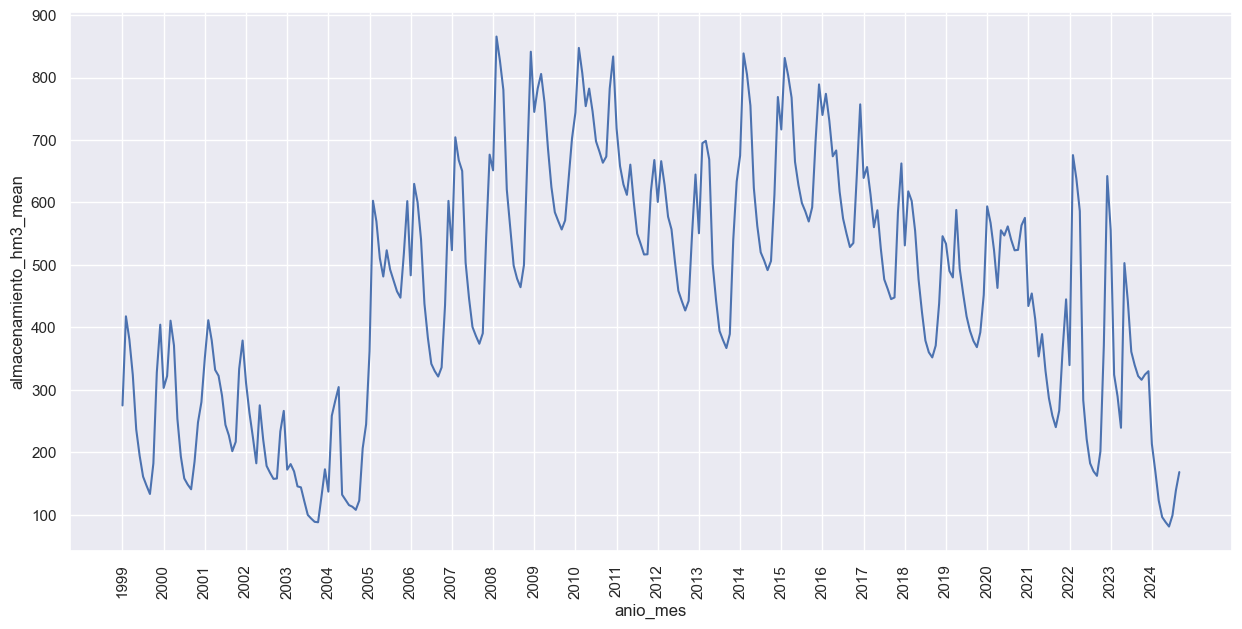

In [45]:
plt.figure(figsize=(15,7))
ax = sns.lineplot(
    data=historico_full,
    x='anio_mes',
    y='almacenamiento_hm3_mean',
)

# anio-mes
# step = 12
# ticks = list(range(0, len(anio_mes_labels), step))
# labels = [anio_mes_labels[i] for i in ticks]

# anios
step = 12
ticks = list(range(0, len(anio_mes_labels), step))
labels = [anio_mes_labels[i].split('-')[0] for i in ticks]

plt.xticks(
    ticks=ticks,
    labels=labels,
    rotation=90
)
# plt.grid(False)
plt.show()

#### Historico por presa

In [46]:
historico_presa = (
    hidricos
    .groupby(['anio_mes', 'presa_nombre_comun'])['almacenamiento_hm3']
    .mean()
    .reset_index(name='almacenamiento_hm3_mean')
)
historico_presa

,anio_mes,presa_nombre_comun,almacenamiento_hm3_mean
0,1999-1,el molinito,6.53
1,1999-1,el novillo,967.76
2,1999-1,guadalupe,61.54
3,1999-1,hermosillo,1.63
4,1999-1,la angostura,265.85
...,...,...,...
2795,2024-9,los pilares,28.79
2796,2024-9,mocúzari,242.00
2797,2024-9,oviachic,501.56
2798,2024-9,punta de agua,2.82


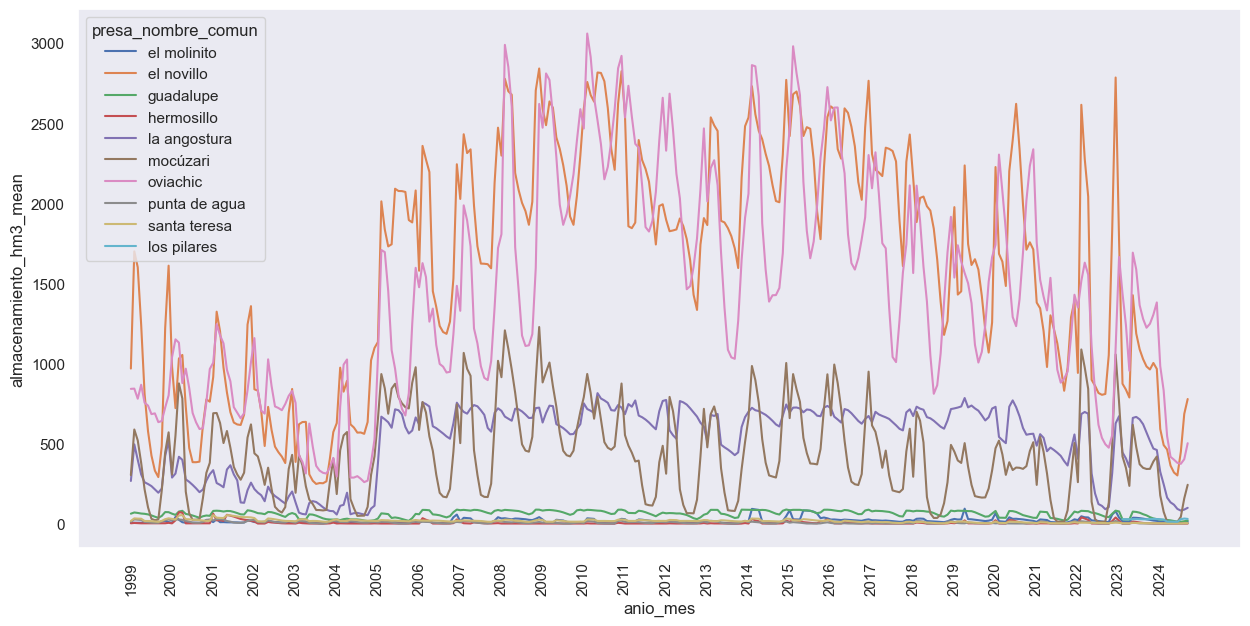

In [47]:
plt.figure(figsize=(15,7))

ax = sns.lineplot(
    data=historico_presa,
    x='anio_mes',
    y='almacenamiento_hm3_mean',
    hue='presa_nombre_comun', 
)
step = 12
ticks = list(range(0, len(anio_mes_labels), step))
labels = [anio_mes_labels[i].split('-')[0] for i in ticks]

plt.xticks(
    ticks=ticks,
    labels=labels,
    rotation=90
)
plt.grid(False)
plt.show()

### Disponibilidad por estaciones 

In [48]:
estaciones = (
    hidricos
    .groupby('mes')['almacenamiento_hm3']
    .agg('mean')
    .reset_index(name='almacenamiento_hm3_mean')
)
estaciones

,mes,almacenamiento_hm3_mean
0,1,495.03
1,2,460.89
2,3,416.15
3,4,376.82
4,5,361.38
...,...,...
7,8,456.11
8,9,545.22
9,10,580.29
10,11,557.92


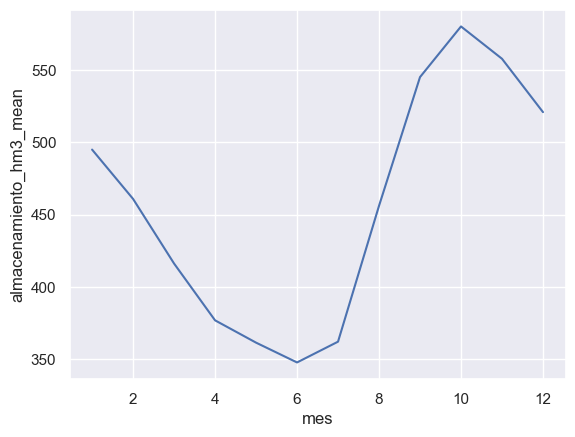

In [49]:
sns.lineplot(
    data=estaciones,
    x='mes',
    y='almacenamiento_hm3_mean',
    # hue='presa_nombre_comun', 
)
plt.show()

### Ranking de presas

In [50]:
presas_almacenamiento = (
    hidricos
    .groupby(['presa_nombre_comun', 'presa'])['almacenamiento_hm3']
    .mean()
    .reset_index(name='almacenamiento_hm3_mean')
)
presas_almacenamiento

,presa_nombre_comun,presa,almacenamiento_hm3_mean
0,el molinito,ing. rodolfo félix valdés,17.89
1,el novillo,plutarco elías calles,1621.69
2,guadalupe,abraham gonzález,60.98
3,hermosillo,abelardo rodríguez luján,4.66
4,la angostura,lázaro cárdenas,516.51
5,los pilares,bicentenario,23.86
6,mocúzari,adolfo ruiz cortines,429.30
7,oviachic,álvaro obregón,1451.34
8,punta de agua,ignacio r. alatorre,6.63
9,santa teresa,cuauhtémoc,15.54


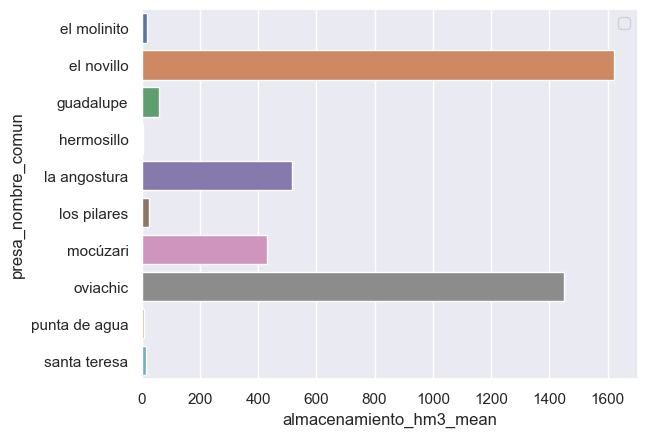

In [51]:
sns.barplot(
    data=presas_almacenamiento, 
    y='presa_nombre_comun', 
    x='almacenamiento_hm3_mean', hue='presa'
)
plt.legend('')
plt.show()

### Eventos extremos 

In [52]:
totales = (
    hidricos
    .groupby('fecha')['almacenamiento_hm3']
    .sum()
    .reset_index(name='almacenamiento_total')
)

Los top 5 máximos históricos (días más húmeros):

In [53]:
eventos_maximos = totales.nlargest(5, "almacenamiento_total")
print(eventos_maximos)

          fecha  almacenamiento_total
3551 2008-09-21               7968.39
3552 2008-09-22               7962.46
3550 2008-09-20               7958.71
3553 2008-09-23               7954.99
3549 2008-09-19               7946.03


Los top 5 mínimos históricos (días más secos):

In [54]:
eventos_minimos = totales.nsmallest(5, "almacenamiento_total")
print(eventos_minimos)

          fecha  almacenamiento_total
1642 2003-07-01                740.59
1641 2003-06-30                742.03
1645 2003-07-04                742.77
1643 2003-07-02                742.84
1644 2003-07-03                743.18


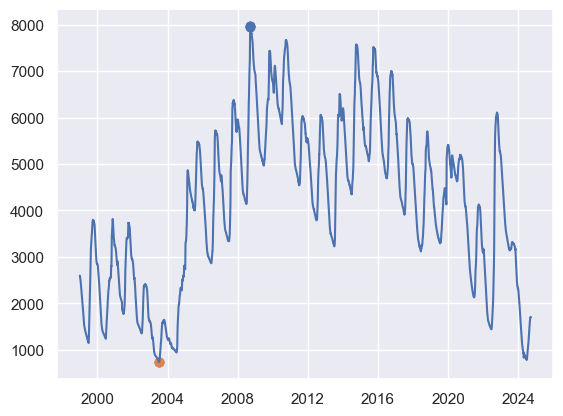

In [55]:
plt.plot(totales.fecha, totales.almacenamiento_total)
plt.scatter(eventos_maximos.fecha, eventos_maximos.almacenamiento_total)
plt.scatter(eventos_minimos.fecha, eventos_minimos.almacenamiento_total)
plt.show()

In [56]:
hidricos.to_csv(eda_dir / "hidricos_1999.csv")

## 4. Conclusiones

...